<a href="https://colab.research.google.com/github/datarae/algorithmic_trading/blob/main/black_scholes_Greeks_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Example 1: Basic Option Pricing ===
Stock price: $100.00
Strike price: $100.00
Risk-free rate: 5.0%
Volatility: 20.0%
Time to expiration: 1.00 years
Call price: $10.45
Put price: $5.57
Put-call parity check: 0.00000000 (should be close to zero)

=== Example 2: Calculate All Greeks ===

First-order Greeks:
Delta (Call): 0.6368
Delta (Put): -0.3632
Gamma: 0.018762
Theta (Call): $-0.0176 per day
Theta (Put): $-0.0045 per day
Vega: $0.3752 per 1% vol change
Rho (Call): $0.5323 per 1% rate change
Rho (Put): $-0.4189 per 1% rate change

Second-order Greeks:
Vanna: -0.002814
Volga (Vomma): 0.098501
Charm (Call): -0.000180 per day
Veta: 0.000117 per day

Third-order Greeks:
Speed: -0.00051596
Zomma: -0.00088885
Color: 0.00001985
Ultima: -1.54440718

=== Example 3: Implied Volatility ===
Theoretical call price with 25.0% volatility: $8.2600
Implied volatility from price: nan%
Market price: $5.00, Implied volatility: nan%
Market price: $8.00, Implied volatility: nan%
Market price: $12.00, I

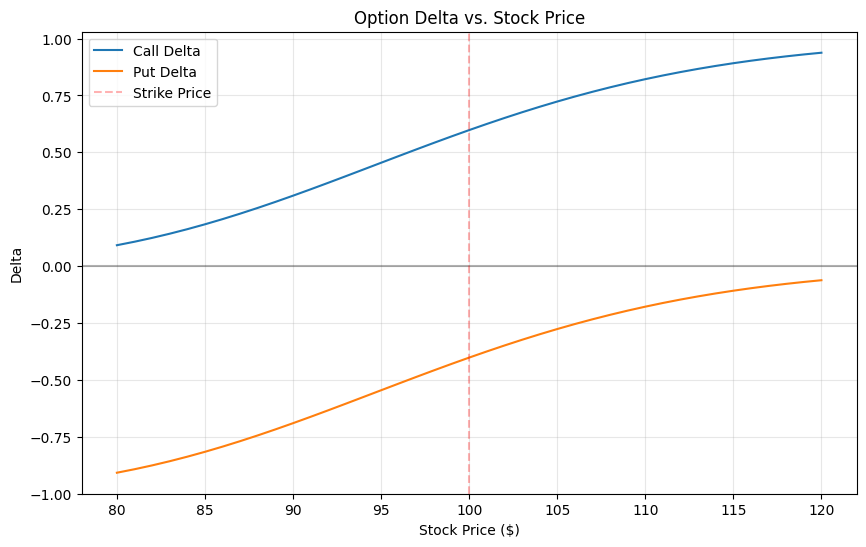

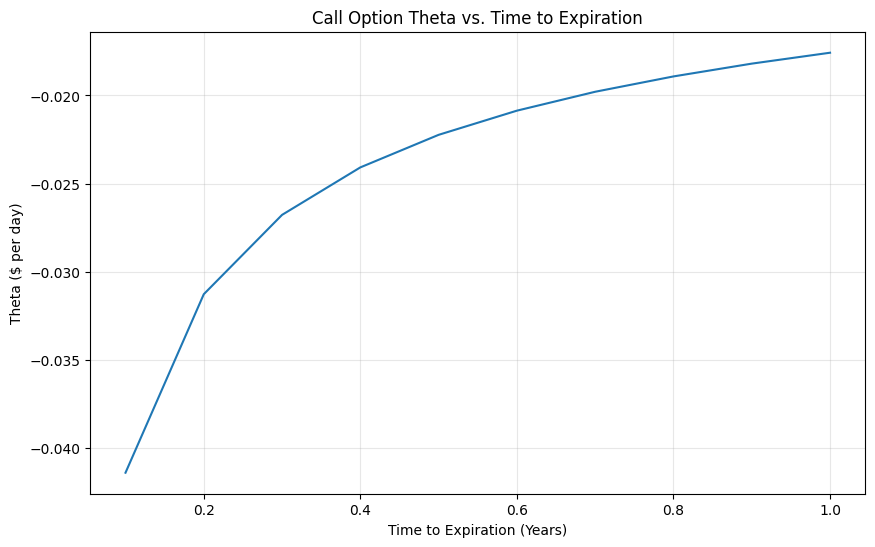

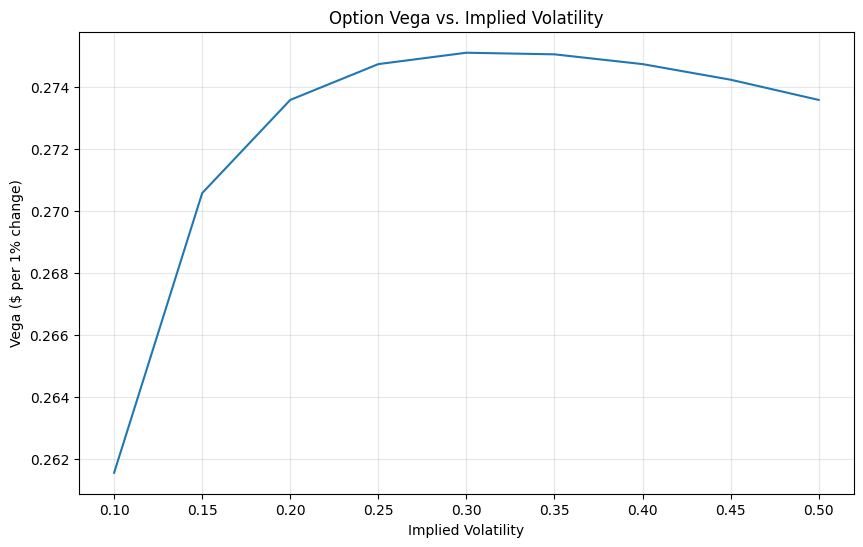

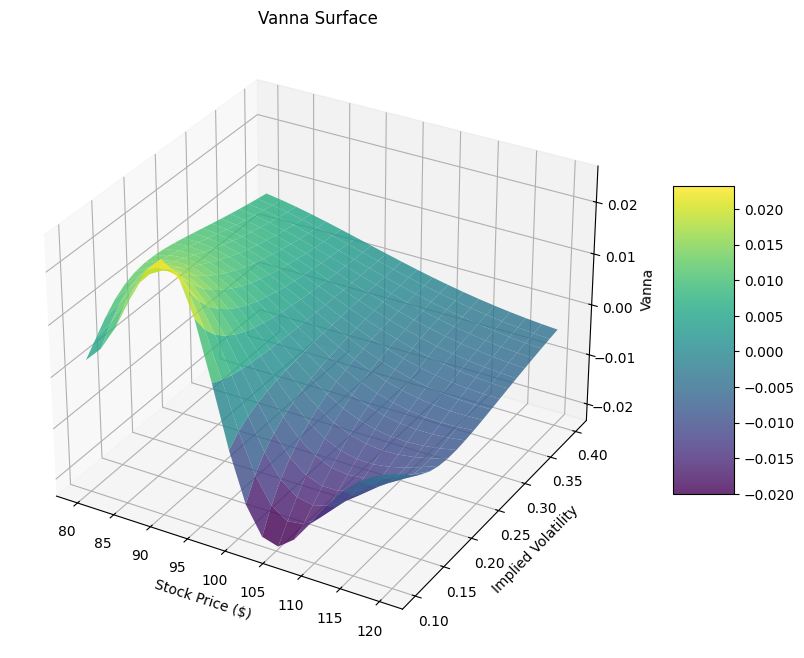


=== Example 6: Using VIX Data ===
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TypeError: unsupported format string passed to Series.__format__

In [2]:
# Black-Scholes and Options Greeks - Usage Examples

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf

# Import custom modules
from trading_tools.options import BlackScholes, Greeks
from trading_tools.watchlists import Volatility  # We'll use this to get VIX data

# Example 1: Basic option pricing
# ------------------------------
def basic_pricing_example():
    print("\n=== Example 1: Basic Option Pricing ===")

    # Option parameters
    S = 100    # Stock price
    K = 100    # Strike price
    r = 0.05   # Risk-free rate (5%)
    sigma = 0.2 # Volatility (20%)
    T = 1.0    # Time to expiration (1 year)

    # Calculate option prices
    call_price = BlackScholes.call_price(S, K, r, sigma, T)
    put_price = BlackScholes.put_price(S, K, r, sigma, T)

    print(f"Stock price: ${S:.2f}")
    print(f"Strike price: ${K:.2f}")
    print(f"Risk-free rate: {r:.1%}")
    print(f"Volatility: {sigma:.1%}")
    print(f"Time to expiration: {T:.2f} years")
    print(f"Call price: ${call_price:.2f}")
    print(f"Put price: ${put_price:.2f}")

    # Calculate put-call parity
    parity_check = call_price - put_price - S + K * np.exp(-r * T)
    print(f"Put-call parity check: {parity_check:.8f} (should be close to zero)")

# Example 2: Calculate all Greeks for an option
# --------------------------------------------
def all_greeks_example():
    print("\n=== Example 2: Calculate All Greeks ===")

    # Option parameters
    S = 100    # Stock price
    K = 100    # Strike price
    r = 0.05   # Risk-free rate (5%)
    sigma = 0.2 # Volatility (20%)
    T = 1.0    # Time to expiration (1 year)

    # Calculate all Greeks
    greeks = Greeks.calculate_all(S, K, r, sigma, T)

    # Display first-order Greeks
    print("\nFirst-order Greeks:")
    print(f"Delta (Call): {greeks['delta_call']:.4f}")
    print(f"Delta (Put): {greeks['delta_put']:.4f}")
    print(f"Gamma: {greeks['gamma']:.6f}")
    print(f"Theta (Call): ${greeks['theta_call']:.4f} per day")
    print(f"Theta (Put): ${greeks['theta_put']:.4f} per day")
    print(f"Vega: ${greeks['vega']:.4f} per 1% vol change")
    print(f"Rho (Call): ${greeks['rho_call']:.4f} per 1% rate change")
    print(f"Rho (Put): ${greeks['rho_put']:.4f} per 1% rate change")

    # Display second-order Greeks
    print("\nSecond-order Greeks:")
    print(f"Vanna: {greeks['vanna']:.6f}")
    print(f"Volga (Vomma): {greeks['volga']:.6f}")
    print(f"Charm (Call): {greeks['charm_call']:.6f} per day")
    print(f"Veta: {greeks['veta']:.6f} per day")

    # Display third-order Greeks
    print("\nThird-order Greeks:")
    print(f"Speed: {greeks['speed']:.8f}")
    print(f"Zomma: {greeks['zomma']:.8f}")
    print(f"Color: {greeks['color']:.8f}")
    print(f"Ultima: {greeks['ultima']:.8f}")

# Example 3: Implied Volatility
# ---------------------------
def implied_volatility_example():
    print("\n=== Example 3: Implied Volatility ===")

    # Option parameters
    S = 100    # Stock price
    K = 100    # Strike price
    r = 0.05   # Risk-free rate (5%)
    T = 0.5    # Time to expiration (6 months)

    # True volatility used to generate a theoretical price
    true_sigma = 0.25

    # Generate theoretical price
    theoretical_call = BlackScholes.call_price(S, K, r, true_sigma, T)
    print(f"Theoretical call price with {true_sigma:.1%} volatility: ${theoretical_call:.4f}")

    # Calculate implied volatility from the price
    implied_sigma = BlackScholes.implied_volatility(theoretical_call, S, K, r, T, 'call')
    print(f"Implied volatility from price: {implied_sigma:.1%}")

    # Try with different market prices
    market_prices = [5.0, 8.0, 12.0, 15.0]
    for price in market_prices:
        implied_vol = BlackScholes.implied_volatility(price, S, K, r, T, 'call')
        print(f"Market price: ${price:.2f}, Implied volatility: {implied_vol:.2%}")

# Example 4: Option Chain Analysis
# ------------------------------
def option_chain_example():
    print("\n=== Example 4: Option Chain Analysis ===")

    # Create a sample option chain DataFrame
    expirations = ['2023-06-16', '2023-09-15', '2023-12-15']
    strikes = [90, 95, 100, 105, 110]

    # Create an empty list to store our rows
    chain_data = []

    # Current date for time to expiry calculation
    current_date = datetime.now()

    # Fill with sample data
    for expiry in expirations:
        expiry_date = datetime.strptime(expiry, '%Y-%m-%d')
        T = (expiry_date - current_date).days / 365.0

        for strike in strikes:
            chain_data.append({
                'expiry': expiry,
                'T': T,
                'strike': strike
            })

    # Convert to DataFrame
    chain_df = pd.DataFrame(chain_data)

    # Calculate option prices and Greeks
    S = 100    # Current stock price
    r = 0.05   # Risk-free rate
    sigma = 0.2 # Volatility

    # Use our function to calculate prices and Greeks
    result_df = BlackScholes.option_chain_pricing(S, chain_df, r, sigma)

    # Display the first few rows
    print("\nOption Chain with Prices and Greeks:")
    print(result_df[['expiry', 'strike', 'call_price', 'put_price', 'delta_call', 'gamma', 'vega']].head())

    # Look at how delta varies across strikes for a specific expiration
    first_expiry = expirations[0]
    first_expiry_df = result_df[result_df['expiry'] == first_expiry]

    print(f"\nDelta Skew for {first_expiry} Expiration:")
    print(first_expiry_df[['strike', 'delta_call']].set_index('strike'))

    # Look at how implied volatility might vary (in a real case, this would be from market prices)
    # Here we'll just simulate a volatility smile
    def vol_smile(strike, atm_vol=0.2, width=20, skew=-0.1):
        return atm_vol + (((strike - 100) / width) ** 2) + skew * (strike - 100) / 100

    # Apply simulated volatility smile
    result_df['impl_vol'] = result_df['strike'].apply(vol_smile)

    # Calculate new prices with implied volatilities
    smile_df = BlackScholes.option_chain_pricing(S, result_df, r, None, True)

    print("\nVolatility Smile:")
    print(smile_df[['strike', 'impl_vol']].drop_duplicates().set_index('strike'))

# Example 5: Plotting Greeks
# ------------------------
def plot_greeks_example():
    print("\n=== Example 5: Plotting Greeks ===")

    # Parameters
    S = 100        # Current stock price
    K = 100        # Strike price
    r = 0.05       # Risk-free rate
    sigma = 0.2    # Volatility
    T = 0.5        # Time to expiration (6 months)

    # Create ranges for our variables
    stock_prices = np.linspace(80, 120, 41)    # Stock price from 80 to 120
    times = np.linspace(0.1, 1.0, 10)          # Time from 0.1 to 1.0 years
    vols = np.linspace(0.1, 0.5, 9)            # Volatility from 10% to 50%

    # Plot 1: Delta vs. Stock Price
    deltas_call = [Greeks.delta(s, K, r, sigma, T, 'call') for s in stock_prices]
    deltas_put = [Greeks.delta(s, K, r, sigma, T, 'put') for s in stock_prices]

    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, deltas_call, label='Call Delta')
    plt.plot(stock_prices, deltas_put, label='Put Delta')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.axvline(x=K, color='red', linestyle='--', alpha=0.3, label='Strike Price')
    plt.title('Option Delta vs. Stock Price')
    plt.xlabel('Stock Price ($)')
    plt.ylabel('Delta')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    # Plot 2: Theta Decay vs. Time
    thetas = [Greeks.theta(S, K, r, sigma, t, 'call') for t in times]

    plt.figure(figsize=(10, 6))
    plt.plot(times, thetas)
    plt.title('Call Option Theta vs. Time to Expiration')
    plt.xlabel('Time to Expiration (Years)')
    plt.ylabel('Theta ($ per day)')
    plt.grid(True, alpha=0.3)
    plt.show()

    # Plot 3: Vega vs. Implied Volatility
    vegas = [Greeks.vega(S, K, r, v, T) for v in vols]

    plt.figure(figsize=(10, 6))
    plt.plot(vols, vegas)
    plt.title('Option Vega vs. Implied Volatility')
    plt.xlabel('Implied Volatility')
    plt.ylabel('Vega ($ per 1% change)')
    plt.grid(True, alpha=0.3)
    plt.show()

    # Plot 4: Vanna Surface (3D)
    from mpl_toolkits.mplot3d import Axes3D

    # Create a mesh grid
    S_range = np.linspace(80, 120, 20)
    vol_range = np.linspace(0.1, 0.4, 20)
    S_mesh, vol_mesh = np.meshgrid(S_range, vol_range)

    # Calculate Vanna for each point in the mesh
    vanna_surface = np.zeros_like(S_mesh)
    for i in range(len(vol_range)):
        for j in range(len(S_range)):
            vanna_surface[i, j] = Greeks.vanna(S_mesh[i, j], K, r, vol_mesh[i, j], T)

    # Create the 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(S_mesh, vol_mesh, vanna_surface, cmap='viridis', alpha=0.8)

    # Add color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    # Add labels
    ax.set_xlabel('Stock Price ($)')
    ax.set_ylabel('Implied Volatility')
    ax.set_zlabel('Vanna')
    ax.set_title('Vanna Surface')

    plt.show()

# Example 6: Real-world application - Using VIX as volatility input
# ---------------------------------------------------------------
def vix_example():
    print("\n=== Example 6: Using VIX Data ===")

    # Get volatility data from our watchlists module
    vol_data = Volatility.get_data(period="1mo")

    if '^VIX' in vol_data:
        # Get the latest VIX value
        latest_vix = vol_data['^VIX']['Close'].iloc[-1]
        print(f"Latest VIX reading: {latest_vix:.2f}%")

        # Convert VIX from percentage to decimal
        vix_decimal = latest_vix / 100

        # Example SPY option
        try:
            spy = yf.Ticker("SPY")
            current_price = spy.history(period="1d")['Close'].iloc[-1]
            print(f"Current SPY price: ${current_price:.2f}")

            # Calculate option prices using VIX as volatility input
            strike = round(current_price)  # At-the-money strike
            expiry_date = (datetime.now() + timedelta(days=30)).strftime('%Y-%m-%d')
            T = BlackScholes.calculate_years_to_expiry(expiry_date)
            r = 0.05  # Assumed risk-free rate

            # Calculate prices
            call_price = BlackScholes.call_price(current_price, strike, r, vix_decimal, T)
            put_price = BlackScholes.put_price(current_price, strike, r, vix_decimal, T)

            print(f"SPY {strike} strike options expiring in {T:.2f} years:")
            print(f"Call price: ${call_price:.2f}")
            print(f"Put price: ${put_price:.2f}")

            # Calculate some key Greeks
            greeks = Greeks.calculate_all(current_price, strike, r, vix_decimal, T)
            print(f"Delta (Call): {greeks['delta_call']:.4f}")
            print(f"Gamma: {greeks['gamma']:.6f}")
            print(f"Vega: ${greeks['vega']:.4f}")
            print(f"Theta (Call): ${greeks['theta_call']:.4f} per day")
            print(f"Vanna: {greeks['vanna']:.6f}")

        except Exception as e:
            print(f"Error fetching SPY data: {e}")
    else:
        print("VIX data not available")

# Run all examples
if __name__ == "__main__":
    basic_pricing_example()
    all_greeks_example()
    implied_volatility_example()
    option_chain_example()
    plot_greeks_example()
    vix_example()